<a href="https://colab.research.google.com/github/Aman1477r/New-repo/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File ‘student-mat.csv’ already there; not retrieving.
Dataset loaded successfully. Shape: (649, 33)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 

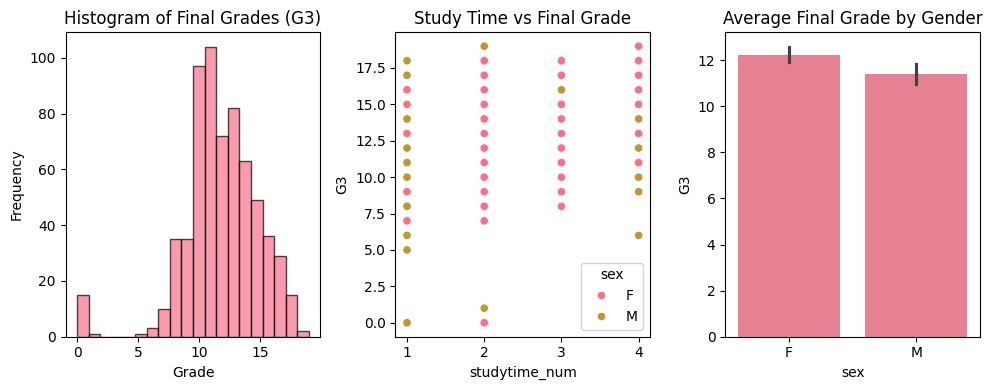

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


!wget -nc https://archive.ics.uci.edu/static/public/320/data.csv -O student-mat.csv


df = pd.read_csv('student-mat.csv', quotechar='"')


numeric_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
    'absences', 'G1', 'G2', 'G3'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Dataset loaded successfully. Shape:", df.shape)


print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


initial_rows = len(df)
df = df.drop_duplicates()
print(f"\nDuplicates removed: {initial_rows - len(df)}")

print("\nFirst few rows:")
print(df.head())
print("\nCleaned dataset shape:", df.shape)

avg_g3 = df['G3'].mean()
print(f"Average final grade (G3): {avg_g3:.2f}")


above_15 = (df['G3'] > 15).sum()
print(f"Students above 15: {above_15} ({above_15/len(df)*100:.1f}%)")


df['studytime_num'] = pd.to_numeric(df['studytime'])
corr_study_g3 = df['studytime_num'].corr(df['G3'])
print(f"Correlation study time vs G3: {corr_study_g3:.3f}")


gender_avg = df.groupby('sex')['G3'].agg(['mean', 'count'])
print("\nAverage G3 by Gender:")
print(gender_avg)



plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.hist(df['G3'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='studytime_num', y='G3', hue='sex')
plt.title('Study Time vs Final Grade')


plt.subplot(1, 3, 3)
sns.barplot(data=df, x='sex', y='G3')
plt.title('Average Final Grade by Gender')

plt.tight_layout()
plt.show()

